![](https://cdn-images-1.medium.com/max/1200/1*3CXBOKNql4qS-lRyHT3pqw.png)

# Contenido
1. Introducción
    * Aprendizaje supervisado
    * Aprendizaje no supervisado
2. Exploratory Data Analysis(EDA)
3. Aprendizaje Supervisado
    * KNN
    * Análisis del modelo
    * Regresión
    * Cross validation
    * Curva de ROC con LogisticRegression
    * Hiperparámetros
    * Trabajando con valores categóricos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('data/column_2C_weka.csv')
df = pd.read_csv('data/app_store_transformed.csv', index_col=0)


# Introducción
El machine learning es el subcampo de las ciencias de la computación y una rama de la inteligencia artificial, cuyo objetivo es desarrollar técnicas que permitan que las computadoras aprendan. De forma más concreta, se trata de crear programas capaces de generalizar comportamientos a partir de una información suministrada en forma de ejemplos.

Para ello, se hace uso de librerías como SciKit Learn, Keras, Tensorflow, Pytorch, XGBoost, etc...

Estás librerías contienen implementaciones de determinados algoritmos que permiten la detección de comportamientos en los datos para obtener un valor o para realizar agrupaciones en base a esos datos.

Existen dos tipos de aprendizaje:



## Aprendizaje supervisado
Se realiza aprendizaje supervisado cuando, en los datos que tenemos, está incluído el valor que queremos predecir, el cuál comunmente se llama variable objetivo.

Para ello se apoya en los demás parámetros que tengamos en nuestros datos y que, con una exploración previa, hayamos decidido incluir para entrenar a nuestro modelo de machine learning.

El aprendizaje supervisado puede ser de los siguientes tipos:

 * Clasificación binaria: La variable objetivo es una categoría con sólo dos valores posibles. Ejemplo: "Si", "No"
 * Clasificación multi clase: La variable objetivo es una categoría con múltiples valores posibles.Ejemplo: "Español", "Inglés", "Francés", etc...
 * Regresión: La variable objetivo es un valor continúo y numérico. Ejemplo: Valores de bolsa


### Tipos de algoritmos
* SVM (Support Vector Machine) - Es un algoritmo de clasificación usado cuando tenemos los grupos que queremos clasificar correctamente diferenciados y, el punto fuerte del algoritmo es que, en caso de que nuestros grupos no estén diferenciados, el algoritmo los separa y diferencia correctamente por nosotros.
![](https://cdn-images-1.medium.com/max/1600/1*3UXkIOXDZoBE9saNmefW4A.png)

* Naives Bayes - Trata cada valos como independiente por lo que su uso más extendido es la detección de spam en email o el análisis de sentimiento
* Decision trees - Pueden usarse tanto para regresiones como clasificaciones. Su uso está bastante extendido a pesar de su tendencia al sobreajuste.
![](https://cdn-images-1.medium.com/max/1600/1*JAEY3KP7TU2Q6HN6LasMrw.png)

## Aprendizaje no supervisado
El aprendizaje no supervisado es el aprendizaje que no tiene variable objetivo, es decir, tenemos predictores pero no tenemos información sobre lo que queremos predecir. Para ello hace uso de determinados algoritmos que detectan patrones en nuestros datos y realizan agrupaciones con ellos, por ejemplo, si una compañia telefónica quiere predecir cuántos clientes se darán de baja pero no tiene esa información, nos interesaría realizar una agrupación de dos clases, una de ellas hará referencia a las personas que se darán de baja y la otra a las que no.


# EXPLORATORY DATA ANALYSIS (EDA)
 Lo primero que debemos realizar es el EDA, un análisis en detenimiento de nuestros datos para detectar posibles datos erróneos o el valor que tienen nuestros predictores sobre nuestra variable objetivo.
 
 En esta fase lo más importante es saber que es cada dato y cómo se afrontaría el problema que queremos resolver con nuestro predictor en la vida real, por ejemplo, si queremos predecir el porcentaje de victoria que tiene una persona en un juego nos interesan predictores de estadísticas del juego o que puedan afectar al rendimiento del jugador pero no me interesa el nombre del jugador o el identificador del usuario porque son datos que no aportan valor a la que sería nuestra variable objetivo.


In [57]:
df.head()

,Id,App,Reviews,Rating,Current Version,Category,Type,Size,Price,Content Rating
1,281656475,PAC-MAN Premium,21292,4.0,6.3.5,Games,Paid,96.1M,3.99$,Everyone
2,281796108,Evernote - stay organized,161065,4.0,8.2.2,Productivity,Free,151.2M,0.0$,Everyone
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",188583,3.5,5.0.0,Weather,Free,95.9M,0.0$,Everyone
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",262241,4.0,5.10.0,Shopping,Free,122.6M,0.0$,Everyone 12+
5,282935706,Bible,985920,4.5,7.5.1,Reference,Free,88.5M,0.0$,Everyone


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 1 to 11097
Data columns (total 10 columns):
Id                 7197 non-null int64
App                7197 non-null object
Reviews            7197 non-null int64
Rating             7197 non-null float64
Current Version    7197 non-null object
Category           7197 non-null object
Type               7197 non-null object
Size               7197 non-null object
Price              7197 non-null object
Content Rating     7197 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 618.5+ KB


In [ ]:
def transform_size(x):
  return float(x[:-1])

def transform_price(x):
  return float(x[:-1])

df['Size'] = df['Size'].apply(transform_size)
df['Price'] = df['Price'].apply(transform_price)
df = df.drop(['Id', 'App', 'Current Version'], axis=1)

In [70]:
df.describe()

,Reviews,Rating,Size,Price
count,7.197000e+03,7197.000000,7197.000000,7197.000000
mean,1.289291e+04,3.526956,189.909671,1.726218
std,7.573941e+04,1.517948,342.566245,5.833006
min,0.000000e+00,0.000000,0.600000,0.000000
25%,2.800000e+01,3.500000,44.700000,0.000000
50%,3.000000e+02,4.000000,92.700000,0.000000
75%,2.793000e+03,4.500000,173.500000,1.990000
max,2.974676e+06,5.000000,3839.500000,299.990000


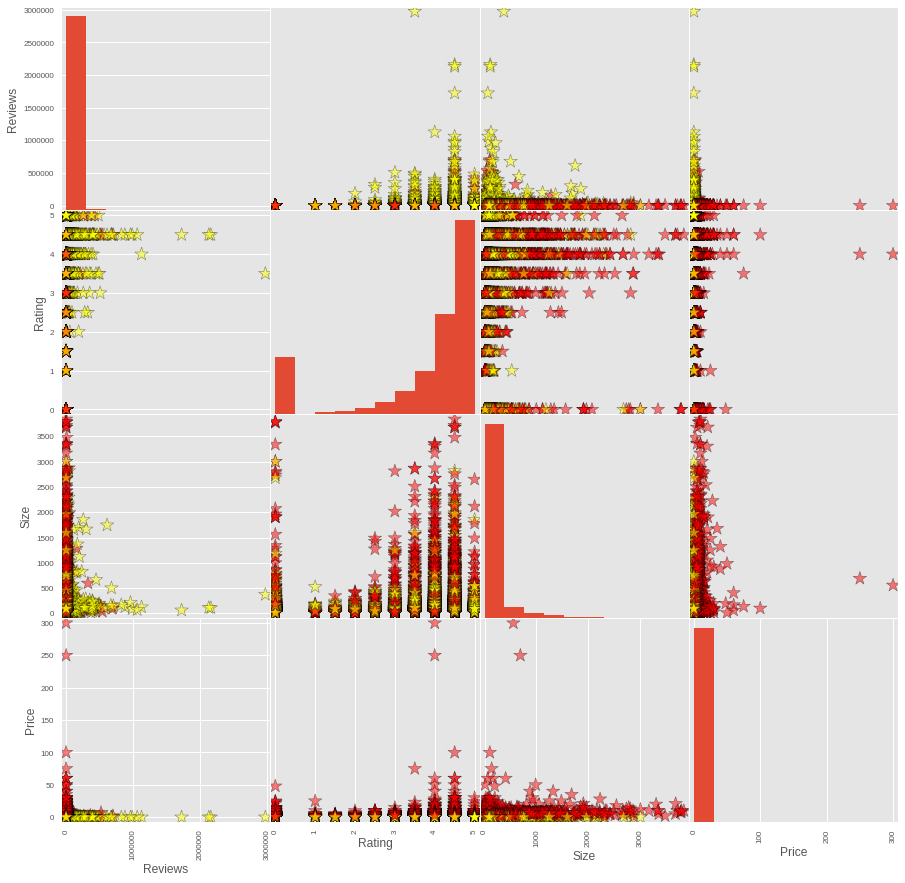

In [75]:
color_list = ['red' if i=='Paid' else 'yellow' for i in df.loc[:,'Type']]
pd.plotting.scatter_matrix(df.loc[:, df.columns != 'Type'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()


Free    4056
Paid    3141
Name: Type, dtype: int64

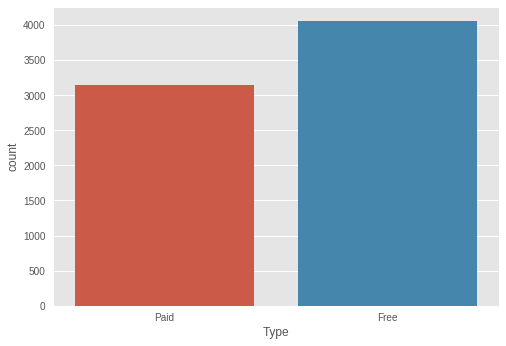

In [76]:
sns.countplot(x="Type", data=df)
df['Type'].value_counts()

# Aprendizaje supervisado

##  K-Nearest Neighbors (KNN)

La idea es realmente sencilla: el algoritmo clasifica cada dato nuevo en el grupo que corresponda, según tenga K vecinos más cerca de un grupo o de otro. Es decir, calcula la distancia del elemento nuevo a cada uno de los existentes, y ordena dichas distancias de menor a mayor para ir seleccionando el grupo al que pertenecer. Este grupo será, por tanto, el de mayor frecuencia con menores distancias.


In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x = df.drop(['Content Rating', 'Category', 'Type'], axis=1)
y= df['Type']
knn.fit(x,y)
prediction = knn.predict(x)
print('Predicción: {}'.format(prediction))

Prediction: ['Paid' 'Free' 'Free' ... 'Paid' 'Free' 'Free']


# Ejercicio
Implementar al algoritmo del ejemplo anterior.

In [ ]:
# Escriba su código aquí

## Análisis del modelo

Una vez hemos realizado nuestro modelo debemos de analizar su rendimiento para saber si realmente está bien entrenado o por el contrario se ha sobreajustado, hemos introducido datos que no deberían haberse usado para el entrenamiento, etc...

El parámetro más común para el análisis de nuestro modelo es la precisión.

Si nos fijamos en el modelo anterior, deberíamos detectar un error en la aplicación del algoritmo para crear nuestro modelo.

Hemos realizado predicciones sobre registros que hemos usado para entrenar, lógicamente nuestro modelo tendrá una precisión elevada por ello.

Para evitar esto, debemos dividir nuestros datos en:
* Datos para entrenamiento
* Datos para test

Normalmente se suele usar un 20% de nuestros datos para test y el resto para el entrenamiento, pero esto puede varias dependiendo de los datos.

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('La precisión de nuestro modelo es: ',knn.score(x_test,y_test))

La precisión de nuestro modelo es:  0.6819444444444445


Tenemos una precisión del 68% pero, ¿es realmente bueno nuestro modelo con esta precisión?

Dependiendo del caso podría ser una medición válida, por ejemplo para el reconocimiento de imágenes con deep learning, pero en nuestro caso no. Esto posiblemente ocurre porque al despreciar las columnas *Content Rating* y *Category* nos hemos quedado con pocos predictores, también puede ser porque no tengamos suficientes datos o porque nuestros predictores no tengan impacto sobre la variable objetivo.

Por último, ¿por qué hemos escogido 3 para el valor de K?

K es un hiperparámetro, de momento vamos a decir que es un valor que tenemos que ajustar para obtener el mejor rendimiento y que su valor varía según el modelo.

Normalmente, cuando K es muy pequeño se dice que el modelo es complejo y que tiende a sobreajustar, lo que significa que nuestro modelo memoriza nuestro datos de entrenamiento y nos proporciona una poca precisión al predecir los datos de test.
Por el contrario, si K es demasiado grande, nuestro modelo es menos complejo por lo que no aprende bien de nuestros datos y tampoco predice correctamente. 



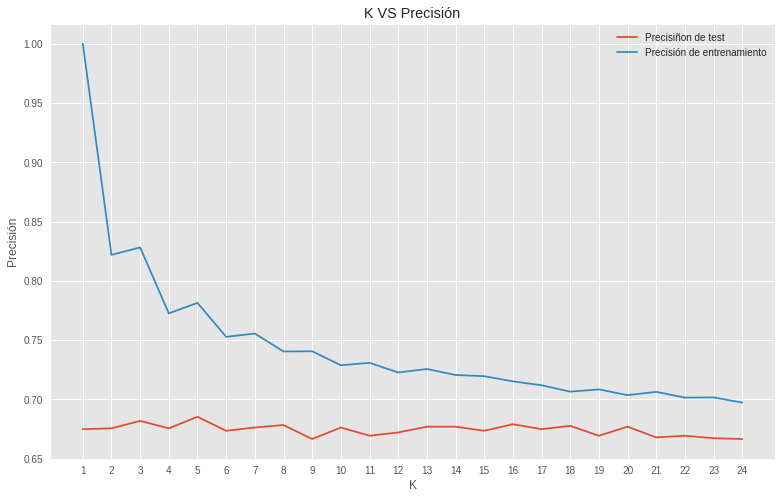

La mejor precisión que podemos obtener es 0.6854166666666667 con K = 5


In [91]:
rg = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
for i, k in enumerate(rg):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[13,8])
plt.plot(rg, test_accuracy, label = 'Precisiñon de test')
plt.plot(rg, train_accuracy, label = 'Precisión de entrenamiento')
plt.legend()
plt.title('K VS Precisión')
plt.xlabel('K')
plt.ylabel('Precisión')
plt.xticks(neig)
plt.show()
print("La mejor precisión que podemos obtener es {} con K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

En la anterior celda podemos ver un ejemplo de como se puede evaluar el ajuste de un hiperparámetro, para ello establecemos un rango sobre el que creemos que puede estar el valor que queremos y visualizar en una gráfica los resultados obtenidos. Gracias a esto podemos ver a partir de que valor nuestro modelo se sobreajusta o por el contrario no consigue detectar los patrones para predecir nuestra variable objetivo

# Ejercicio
Implementar un algoritmo supervisado con el hiperparámetro K correctamente ajustado para nuestros datos y visualizar en una gráfica que el valor de K usado es el correcto.

In [ ]:
# Escriba su código aquí

## REGRESSION


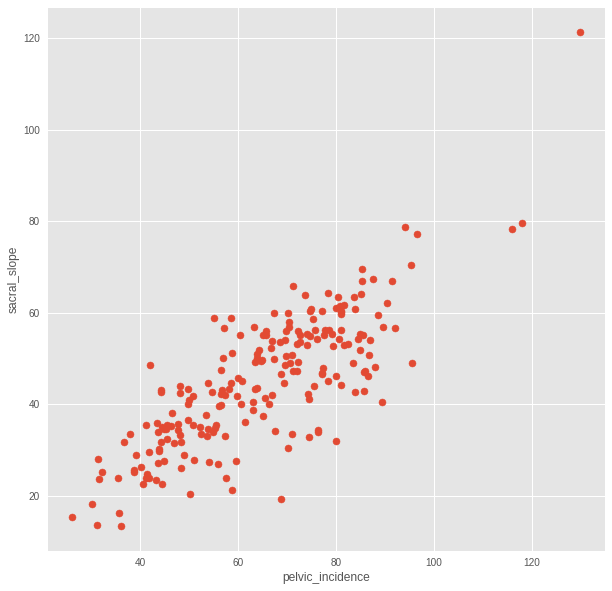

In [99]:
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

### Linear regression
En una regresión lineal simple y = ax + b  donde y es nuestra variable objetivo, x nuestros predictores y a los hiperparámetros.
Para ajustar estos hiperparámetros se usa la función del mínimo error como la función de pérdida que, en una regresión lineal, esta suele ser una Ordinary Least Square(OLS) . La puntuación de un algoritmo de regresión lineal utiliza el método R^2 que es ((y_pred - y_mean)^2)/(y_actual y_mean)^2

R^2 score:  0.6458410481075871


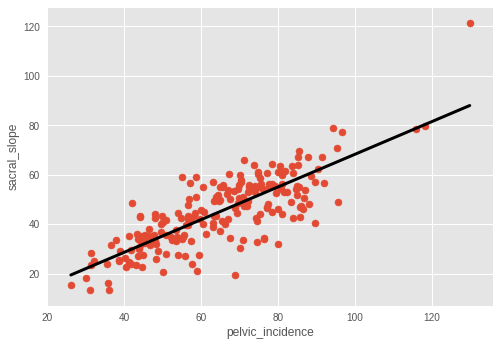

In [100]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
reg.fit(x,y)
predicted = reg.predict(predict_space)
print('R^2 score: ',reg.score(x, y))

plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

## CROSS VALIDATION
Anteriormente, usamos train_test_split con un random_state que siempre separa nuestros datasets para entrenamiento y para testeo de la misma forma. Por el contrario, si no seteamos este valor nuestros datos se separaran de distintas forma cada vez que ejecutemos el código y esto producirá que la precisión de nuestro modelo cambie en cada ejecución.

¿Con qué precisión nos quedamos para analizar nuestro modelo? No podemos saberlo y, por eso, usamos cross calidation para buscar una precisión correcta.


In [101]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average:  0.39314625028848676


K hace referencia al número de veces que separamos nuestro dataset, lo entrenamos y predecimos. Hay que tener en cuenta que cuando K aumenta, también aumenta el coste computacional por lo que tardaremos más en entrenar nuestro modelo.




## Curva de ROC con LogisticRegression

LogisticRegression nos proporciona una salida probabilística. Por defecto el umbral de regresión es 0.5, es decir, si nuestra salida es 1 o 0 todos los resultados que sean mayores que 0.5 serán clasificados como 1 y los menores como 0.

Para analizar el rendimiento de este algoritmo podemos usar la curva de ROC. En esta curva, el eje X es la tasa de falsos positivos y el eje Y es la tasa de verdaderos positivos, por ello si la curva está cerca de la esquina superior izquierda nuestro modelo es más preciso.

La puntuación de la curva de Roc se conoce como AUC que es el área de cálculo debajo de la curva de las puntuaciones de predicción. Mientras más cerca este el valor de AUC de 1 mejor será nuestro modelo.



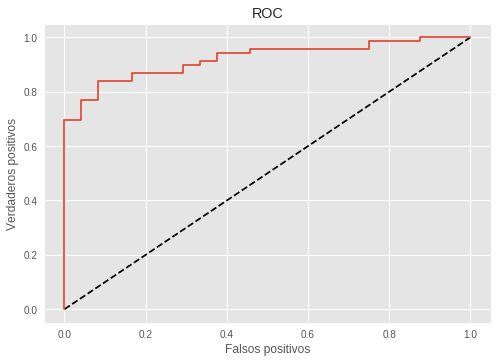

In [110]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('ROC')
plt.show()

# Ejercicio
Implementar un LinearRegression o LogisticRegression con un método para validad nuestro modelo.

In [ ]:
# Escriba su código aquí

## Hiperparámetros
Como se ha mencionado anteriormente, todos los algoritmos tienen hiperparámetros que se tienen que ajustar para conseguir un rendimiento óptimo del mismo. 

Por ejemplo: 
    

*   *K* en **KNN**
*   *max_leaves* en **LighGBM**
*   *max_depth* en **RandomForest**


     
    
    
Para ajustar correctamente nuestros hiperparámetros, hemos visto que podemos probar diferentes combinaciones y entrenar en base los distintos valores para, posteriormente, ver cual se ajusta más al rendimiento que queremos obtener en nuestro modelo.

Aunque anteriormente hemos usado un *for* para iterar e ir probando los diferentes valores que creíamos que ajustarían mejor nuestro modelo.

Por suerte, no tenemos que realizar un for para cada hiperparámetro que queremos ajustar ya que conllevaría un coste computacional muy alto.

Para ello tenemos GridSearchCV



In [109]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3)
knn_cv.fit(x,y)

# Print hyperparameter
print("Hiperparámetro K ajustado: {}".format(knn_cv.best_params_)) 
print("Mejor puntuación: {}".format(knn_cv.best_score_))


Hiperparámetro K ajustado: {'n_neighbors': 7}
Mejor puntuación: 0.6501319994442128


GridSearchCV recibe nuestro algoritmo y un diccionario con los parámetros que queremos ajustar y el rango de esos parámetros que queremos probar

## Trabajando con valores categóricos
Como hemos visto tenemos dos tipos de datos:


1.   Cuantitativos
2.   Categóricos

La mayoría de algoritmos no permiten usar valores categóricos para entrenar o para predecir. Por esto, hay que transformar esos datos categóricos a datos cuantitativos.

Una de las opciones que tenemos a la hora de realizar esta transformación es realizar la técnica conocida como One Hot Enconding(OHE), esto consiste en crear columnas tantas columnas como distintos valores categóricos hay en cada columna de nuestro dataset. Estas nuevas columnas tendrán como valor 0 o 1 dependiendo del valor que tenía el registro en esa columna sobre la que se ha realizado el OHE



In [107]:
y = df['Type']
x = df.drop(['Type'], axis=1)
x = pd.get_dummies(x)
x.head(10)

,Reviews,Rating,Size,Price,Category_Book,Category_Business,Category_Catalogs,Category_Education,Category_Entertainment,Category_Finance,...,Category_Shopping,Category_Social Networking,Category_Sports,Category_Travel,Category_Utilities,Category_Weather,Content Rating_Adults only,Content Rating_Everyone,Content Rating_Everyone 12+,Content Rating_Teen
1,21292,4.0,96.1,3.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,161065,4.0,151.2,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,188583,3.5,95.9,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,262241,4.0,122.6,0.00,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5,985920,4.5,88.5,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,8253,4.0,10.0,0.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,119487,4.0,217.2,0.00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,1126879,4.0,124.2,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1117,4.5,47.0,9.99,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
10,7885,4.0,66.8,3.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Como se puede obsevar esto tiene un punto negativo y es que nuestro dataset puede crecer indefinidamente en el número de columnas y esto produce un aumento del tiempo que tardará en entrenarse nuestro modelo y, por supuesto, un aumento de los recursos de hardware necesarios para realizar este modelo

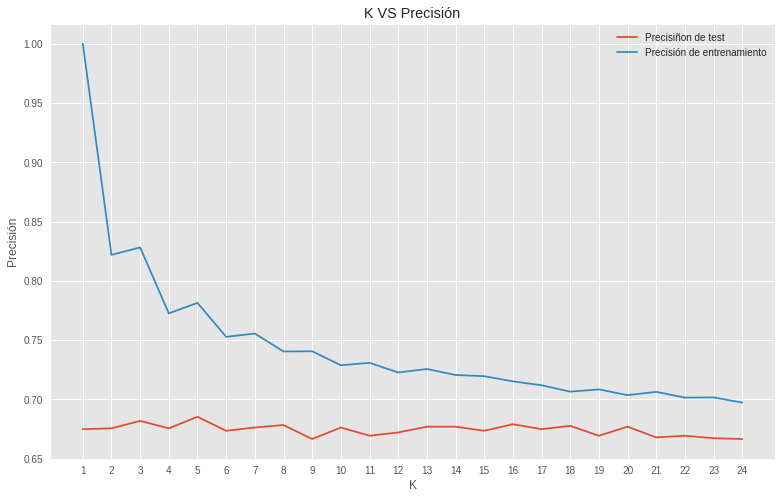

La mejor precisión que podemos obtener es 0.6854166666666667 con K = 5


In [108]:
rg = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
for i, k in enumerate(rg):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[13,8])
plt.plot(rg, test_accuracy, label = 'Precisiñon de test')
plt.plot(rg, train_accuracy, label = 'Precisión de entrenamiento')
plt.legend()
plt.title('K VS Precisión')
plt.xlabel('K')
plt.ylabel('Precisión')
plt.xticks(neig)
plt.show()
print("La mejor precisión que podemos obtener es {} con K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

# LightGBM

Su nombre es Light Gradient Boosting Model y fue desarrollado en el año 2016 por Microsoft. Se basa en los algoritmos de árboles de decisión, pero en lugar de dividir el árbol por nivel, lo divide por hojas.

Según Microsoft sus ventajas son:
* Mayor velocidad de entrenamiento y mayor eficiencia
* Menor uso de memoria
* Mejor precisión
* Capaz de manejar datos a gran escala


Una posible desventaja de este algoritmo es que al dividirse por hojas en vez de por profundidad tiende a sobreajustar. Por suerte, podemos evitar el sobreajuste gracias a los siguiente parámetros:
 * max_depth: Máxima profundidad del árbol. En mi opinión, este es el primer parámetro que deberías revisar si tu modelo tiende a sobreajustarse.
 * min_data_in_leaf: Es el mínimo de registros que puede tener una hoja.
 * num_leaves: Con este parámetro establecemos la cantidad de hojas que se formarán en un árbol.


Una ventaja de usar LightGBM es la posibilidad de usar variables categóricas en vez de tener que usar one-hot-enconding, ya que usando one-hot-encoding podemos tener el problema de que nuestro dataset puede crecer considerablemente en dimensionalidad.

![](images/machine_learning/lightgbm.png)

In [ ]:
train_index = round(int(x_train.shape[0]*0.8))
dev_X = x_train[:train_index] 
val_X = x_train[train_index:]
dev_y = y_train[:train_index] 
val_y = y_train[train_index:] 

params = {"objective" : "regression", "metric" : "mae", 'n_estimators':20000, 'early_stopping_rounds':200,
          "num_leaves" : 31, "learning_rate" : 0.05, "bagging_fraction" : 0.7, "bagging_seed" : 0, 
          "num_threads" : 4,"colsample_bytree" : 0.7}
    
lgtrain = lgb.Dataset(dev_X, label=dev_y)
lgval = lgb.Dataset(val_X, label=val_y)
model = lgb.train(params, lgtrain, valid_sets=[lgtrain, lgval], early_stopping_rounds=200, verbose_eval=1000)
    
pred_test_y = model.predict(x_test, num_iteration=model.best_iteration)
pred_test_y

# Ejercicio


Realizar un EDA en profundidad sobre cualquier dataset.

Implementar el algoritmo RandomForestClassifier sobre los datos obtenidos del ejercicio anterior